# Example on calibrating the LinoSPAD2 detector

This example shows how the calibration data analysis is done. For calibrating the TDC nonlinearities, the data
should be collected with ambient light covering the whole sensor (make sure
there is no readout saturation). The more data collected, the better
the calibration will be. Ideally, the calibration should be done at a given temperature
and later recalled for data collected at the same temperature. However, for longer source coherence times (like Ne or Ar lamps), the contrast is usually so high that a quick calibration ignoring the temperatures is often quite enough.

For this demonstration, 30 data files were collected, with 1000 cycles, 4 ms-long acquisition cycles, and 1000 timestamps per TDC set, with a total of 7.3 GB of data.

First, import the necessary function from the LinoSPAD2 library.

In [6]:
from LinoSPAD2.functions import calibrate, sensor_plot

# Path to the folder with the '.dat' data files that should be used for
# calculating the calibration matrix
path = r'D:\LinoSPAD2\Data\B7d\2024.10.14\TDC_calib_2212b'

Just to show how the light should cover the sensor, let us have a look at the sensor population plot.


> > > Collecting data for sensor population plot,Working in D:\LinoSPAD2\Data\B7d\2024.10.14\TDC_calib_2212b < < <




> > > Plotting < < <

> > > The plot is saved as '{plot_name}_single_file.png'in {os.getcwd()} < < <


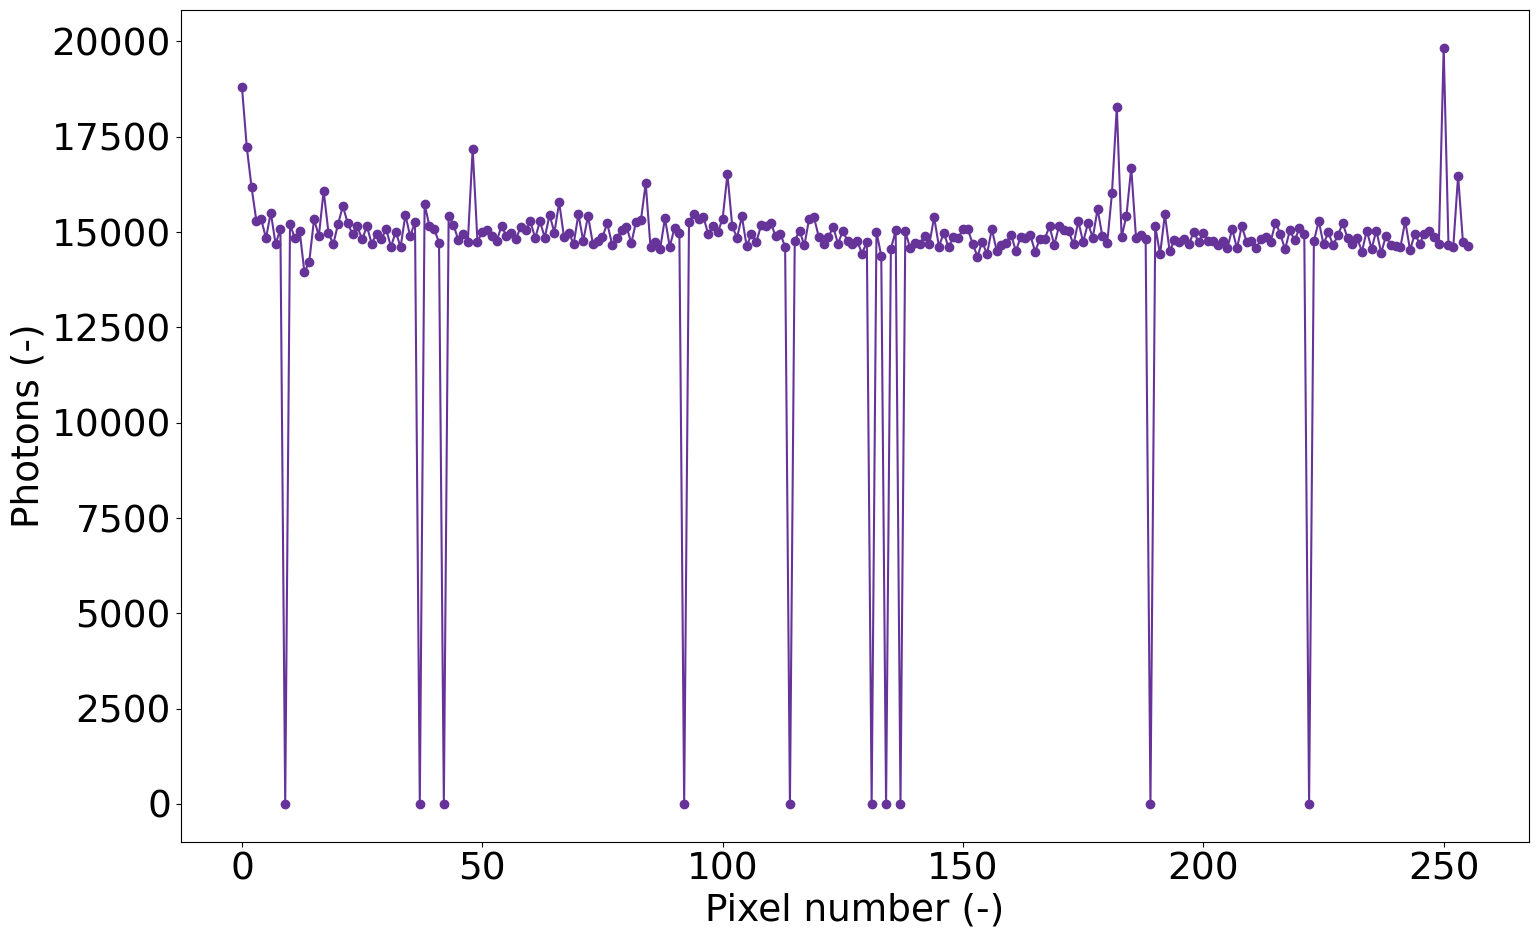

In [7]:
sensor_plot.plot_sensor_population(
    path,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212b",
    timestamps=1000,
    single_file=True
)

To check that there was no readout saturation during data collecting, one can plot a histogram of timestamps from a single pixel. The data quality is good if the histogram is more or less flat with no prominent cut-outs or sudden decrease at the right edge of the histogram.

The 'plot_single_pix_hist' function from the "sensor_plot" module analyzes all files in the given folder. Here, for demonstration purposes, a single file is enough, which I copied to a separate folder and ran the function there.

> > > Plotting pixel histograms, Working on 0000021229.dat < < <



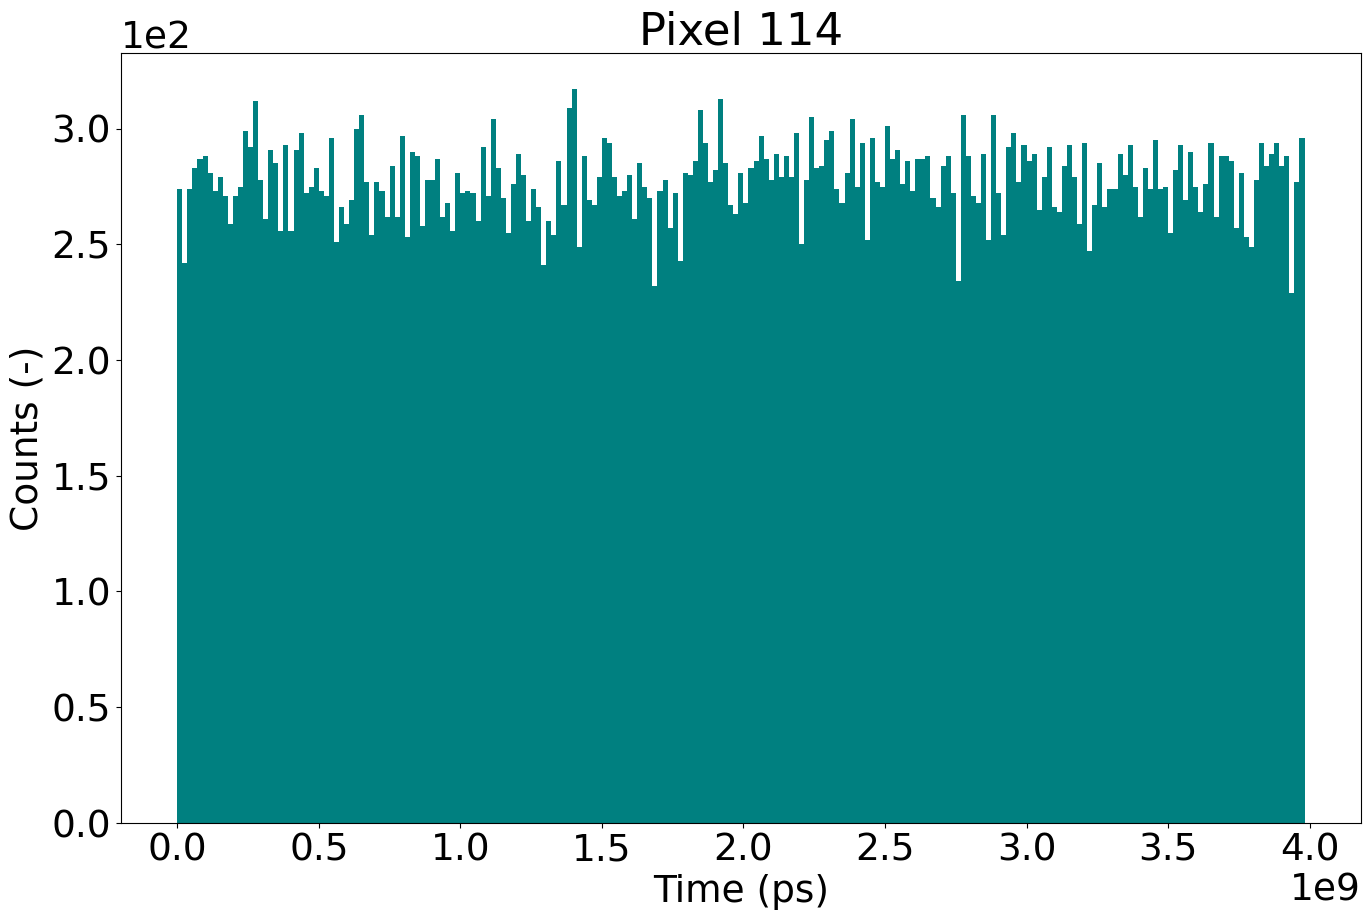

In [12]:
# Path to the folder with a single '.dat' data file
path_1 = r'D:\LinoSPAD2\Data\B7d\2024.10.14\TDC_calib_2212b\1'

sensor_plot.plot_single_pix_hist(
    path_1,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212b",
    timestamps=1000,
    pixels=[114],
    show_fig=True
)

The data looks ok, no readout saturation was reached, and we can continue with the calibration procedure.

Now, run the calibration function itself, where the parameters daughter and motherboard numbers together with the firmware version are used in the resulting calibration matrix name for later recalling it for the data collected with the same parameters. The number of timestamps should be set right for correct extraction of the data, but it does not have an effect on the calibration matrix and it can be used for data collected with other timestamp numbers later on.

In [5]:
calibrate.calibrate_and_save_TDC_data(
    path,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212b",
    timestamps=1000,
)

Calculating TDC calibration, going through files: 100%|██████████| 30/30 [01:53<00:00,  3.78s/it]


When the function is done working, "TDC_B7d_#28_2212b.csv" file will appear in the folder with the '.dat' files. The "TDC_B7d_#28_2212b.csv" file has to be placed in the ~\LinoSPAD2\src\LinoSPAD2\params\calibration_data folder. The file will be called automatically by other function, when "apply_calibration" parameter is set to 'True' (which is by default).